In [1]:
import os, sys
import shutil
import numpy as np
import matplotlib.pyplot as plt

Thermal_CNT_0_25_1.96.log.lammps
[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02, 0.0225, 0.025, 0.0275, 0.03, 0.0325, 0.035, 0.0375, 0.04, 0.0425, 0.045, 0.0475, 0.05, 0.0525, 0.055, 0.0575, 0.06, 0.0625, 0.065, 0.0675, 0.07, 0.0725, 0.075, 0.0775, 0.08, 0.0825, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075, 0.11, 0.1125, 0.115, 0.1175, 0.12, 0.1225, 0.125, 0.1275, 0.13, 0.1325, 0.135, 0.1375, 0.14, 0.1425, 0.145, 0.1475, 0.15, 0.1525, 0.155, 0.1575, 0.16, 0.1625, 0.165, 0.1675, 0.17, 0.1725, 0.175, 0.1775, 0.18, 0.1825, 0.185, 0.1875, 0.19, 0.1925, 0.195, 0.1975, 0.2, 0.2025, 0.205, 0.2075, 0.21, 0.2125, 0.215, 0.2175, 0.22, 0.2225, 0.225, 0.2275, 0.23, 0.2325, 0.235, 0.2375, 0.24, 0.2425, 0.245, 0.2475, 0.25, 0.2525, 0.255, 0.2575, 0.26, 0.2625, 0.265, 0.2675, 0.27, 0.2725, 0.275, 0.2775, 0.28, 0.2825, 0.285, 0.2875, 0.29, 0.2925, 0.295, 0.2975, 0.3, 0.3025, 0.305, 0.3075, 0.31, 0.3125, 0.315, 0.3175, 0.32, 0.3225, 0.325, 0.3275, 0.33, 0.3325,

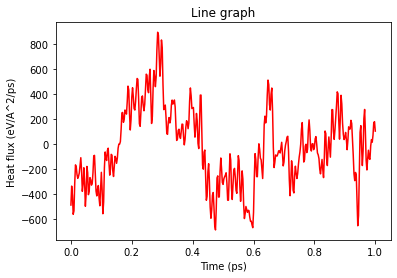

In [33]:
## Takes in files that has .lammps in their names. Limited to only the folder this scirpt is in.
all_the_log_files = [f for f in os.listdir() if f.endswith('.lammps') and not os.path.isdir(f)]

store_numpy_arrays = []

# for i, log_file in enumerate(all_the_log_files):
for i, log_file in enumerate(all_the_log_files):
    print(log_file)
    file_stem = log_file.replace('.log.lammps','')

    ## Get the text from the log file
    with open(log_file, 'r') as f:
        txt = f.readlines()

    col_check_str = '   Step          Temp       c_myFlux[1]  '
    end_check_str = 'Loop time of '
    columns = None
    start_idx, end_idx = 0, len(txt)
    
    ## If the code detects a particular line, begin reading the entire section below that until a certain point
    for line_idx, line in enumerate(txt):
        if col_check_str in line:
            columns = line.strip().split()
            start_idx = line_idx + 1
        if end_check_str in line and columns:
            end_idx = line_idx - 1
    
    
    data0 = txt[start_idx:end_idx + 1]
    data = [row for row in data0 if len(row.split()) == 3] ## Should the log.lammps be cut off early, remove cut off row
    columns_entry = None
    
    ## PRINT DEBUG
#     print(columns)
#     print(start_idx,end_idx)
#     print(data0[-1:])

    ## write the CSV file
    csv_name = f'{file_stem}.csv'
    with open(csv_name, 'w') as f:
        f.write(",".join(columns) + "\n")
        for start_idx in data:
            ## Check if the rows has all the columns. If it is missing all 14 columns, remove the entire row.
            ## Suggested by Drew Rohskopf
            columns_entry = start_idx.strip().split()
            line_length = len(columns_entry)
            if (line_length==3):
                f.write(",".join(columns_entry) + "\n")
                
    ## Create an array to store each elements in a column
    arr = np.array([[float(element) for element in row.split()] for row in data])
    store_numpy_arrays.append(arr)

    copy_arr = arr.copy()
    col_flux = copy_arr[:,2]
    
    ## Array for timestep converted to picosecond
    ps_arr = [] 
    snapshots = 0
    
    ## PRINT DEBUG
    #print(col_flux)
    #print(col_step)
    
    ## Calculate timesteps into picoseconds
    for counter in data:
        picoseconds = 0.0005 * snapshots
        ps = round(picoseconds,8)
        ps_arr.append(ps)
        #print(ps)
        snapshots = snapshots + 5
    
    print(ps_arr)
    
    ## 1 row, 2 column of graphs for temperature for subplots
#     fig, axes = plt.subplots(1, 2, figsize = [15,4])
    
#     axes[0].plot(ps_arr, col_flux,label="temperature",c="r")
#     axes[0].set_title('Heat Flux vs Time')
#     axes[0].set_xlabel('MD Time (ps)')
#     axes[0].set_ylabel('Heat Flux')
#     axes[0].yaxis.get_ticklocs(minor=True)
#     axes[0].minorticks_on()

    plt.title("Line graph")
    plt.plot(ps_arr, col_flux, color="red")
    plt.xlabel('Time (ps)')
    plt.ylabel('Heat flux (eV/A^2/ps)')
